In [281]:
import pandas as pd
import datetime as dt

data = pd.read_csv("Raw_data/rfm_xmas19.txt", parse_dates=["trans_date"])
group_by_customer = data.groupby("customer_id")
last_transaction = group_by_customer["trans_date"].max()
print(last_transaction.head())

customer_id
FM1112   2019-10-14
FM1113   2019-11-09
FM1114   2019-11-12
FM1115   2019-12-05
FM1116   2019-05-25
Name: trans_date, dtype: datetime64[ns]


In [ ]:
best_churn = pd.DataFrame(last_transaction)
cutoff_day = dt.datetime(2019, 10, 16)
best_churn["churned"] = best_churn["trans_date"].apply(
    lambda date: 1 if date < cutoff_day else 0
)

In [ ]:
best_churn["nr_of_transactions"] = group_by_customer.size()
best_churn["amount_spent"] = group_by_customer.sum()
best_churn.drop("trans_date", axis="columns", inplace=True)

In [ ]:
# min-max feature scaling
best_churn[["nr_of_transactions", "amount_spent"]].describe().loc[["min", "max"]]

In [ ]:
best_churn['scaled_tran'] = (best_churn.nr_of_transactions-best_churn.nr_of_transactions.min()) / (best_churn.nr_of_transactions.max()-best_churn.nr_of_transactions.min())
best_churn['scaled_amount'] = (best_churn.amount_spent-best_churn.amount_spent.min()) / (best_churn.amount_spent.max()-best_churn.amount_spent.min())
best_churn['score'] = (0.5*best_churn.scaled_tran + 0.5*best_churn.scaled_amount)*100
best_churn.sort_values('score', ascending=False, inplace=True)

In [ ]:
best_churn.head()

In [ ]:
# decide on a threshold to determine which customers are "the best."
data.head(2)

In [ ]:
coupon = data.tran_amount.mean()*0.3
nr_of_customers = 1000/coupon  # budget = $1000
print(coupon, nr_of_customers, sep="\n")

In [ ]:
# Given the budget, decided to send $20 coupons to the 50 best customers.  Customers were ranked on number of purchases made and amount spent.  

top_50_churned = best_churn.loc[best_churn["churned"] == 1].head(50)
top_50_churned.to_csv('best_customers.txt')

### Communicating Results
https://app.dataquest.io/m/467/communicating-results/1/business-context

In [282]:
import pandas as pd

playstore = pd.read_csv("Raw_data\googleplaystore.csv")
print(playstore.shape)
playstore.tail(2)

(10841, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [283]:
playstore.Category.value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [284]:
playstore[playstore.Category=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [285]:
# entry at index 10472 had incorrect data. the category field is missing and the genre value is also missing.

In [286]:
playstore.drop(labels=10472, inplace=True)

In [287]:
# project is focused on paid apps
playstore["Price"] = playstore["Price"].str.replace("$", "").astype("float")
paid = playstore[playstore["Price"] > 0]
paid.drop("Type", axis=1, inplace=True)
paid["Reviews"] = paid["Reviews"].astype(int)

In [288]:
paid.shape

(800, 12)

In [289]:
paid.head(2)

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up


In [290]:
paid.Size.value_counts().head()

Varies with device    76
14M                   16
20M                   14
23M                   14
12M                   13
Name: Size, dtype: int64

In [291]:
def clean_size(sz):
    s = sz[0:-1]
    u = sz[-1]
    return [s, u]

In [292]:
paid["Size"] = paid["Size"].apply(clean_size)
paid.Size.head()

234                  [6.8, M]
235                   [39, M]
290                  [6.8, M]
291                   [39, M]
427    [Varies with devic, e]
Name: Size, dtype: object

In [293]:
paid[['S', 'U']] = pd.DataFrame(paid.Size.values.tolist(), index= paid.index)
paid.drop(['Size'], axis=1, inplace=True)
paid.head(2)

,App,Category,Rating,Reviews,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,S,U
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,"100,000+",4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up,6.8,M
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,"100,000+",4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up,39,M


In [294]:
paid.U.value_counts()

M    654
e     76
k     70
Name: U, dtype: int64

In [295]:
paid = paid[paid.U!='e']
paid.head(2)

,App,Category,Rating,Reviews,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,S,U
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,"100,000+",4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up,6.8,M
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,"100,000+",4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up,39,M


In [296]:
print("Number of rows before dropping duplicates: {}".format(paid.shape[0]))
paid.drop_duplicates(inplace=True)
print("Number of rows after dropping duplicates: {}".format(paid.shape[0]))

Number of rows before dropping duplicates: 724
Number of rows after dropping duplicates: 691


In [ ]:
paid.duplicated(subset='App').sum()

In [ ]:
paid[paid.duplicated(subset='App')==1]

In [ ]:
paid[paid.App =="Toca Life: City"]

In [ ]:
paid[paid.App =="Fuzzy Numbers: Pre-K Number Foundation"]

In [ ]:
paid[paid.App =="HD Widgets"]

In [ ]:
paid[paid.App =="Dr. Panda & Toto's Treehouse"]

In [ ]:
paid[paid.App =="The Game of Life"]

In [ ]:
paid[paid.App =="Human Anatomy Atlas 2018: Complete 3D Human Body"]

In [297]:
app_mask = paid["App"].isin(["Fuzzy Numbers: Pre-K Number Foundation", "Toca Life: City"])
category_mask = paid['Category']=='FAMILY'
paid[app_mask&category_mask]

,App,Category,Rating,Reviews,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,S,U
2151,Toca Life: City,FAMILY,4.7,31100,"500,000+",3.99,Everyone,Education;Pretend Play,"July 6, 2018",1.5-play,4.4 and up,24,M
4301,Fuzzy Numbers: Pre-K Number Foundation,FAMILY,4.7,21,"1,000+",5.99,Everyone,Education;Education,"July 21, 2017",1.3,4.1 and up,44,M


In [298]:
paid.drop([2151, 4301], inplace=True)

In [299]:
paid[paid.duplicated(subset='App') ==1]

,App,Category,Rating,Reviews,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,S,U
6919,HD Widgets,PERSONALIZATION,4.3,58614,"1,000,000+",0.99,Everyone,Personalization,"December 7, 2016",4.3.2,4.4 and up,26,M
8785,Dr. Panda & Toto's Treehouse,FAMILY,4.4,3397,"50,000+",3.99,Everyone,Casual;Pretend Play,"December 9, 2014",1.8,4.0 and up,9.5,M
9569,The Game of Life,GAME,4.4,18652,"100,000+",2.99,Everyone,Board,"July 4, 2018",2.1.2,4.4 and up,63,M
9574,Human Anatomy Atlas 2018: Complete 3D Human Body,MEDICAL,4.5,2923,"100,000+",24.99,Everyone,Medical,"May 25, 2018",2018.5.47,5.0 and up,25,M


In [300]:
paid.sort_values("Reviews", ascending=False, inplace=True)
paid.drop_duplicates("App", inplace=True)
paid.reset_index(inplace=True, drop=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000252BE6FB0B8>]],
      dtype=object)

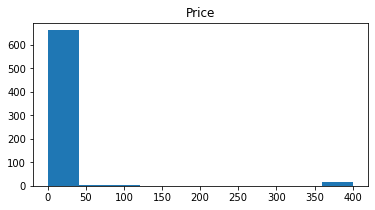

In [301]:
paid.hist(column="Price", grid=False, figsize=(6,3))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000252C02E5EF0>]],
      dtype=object)

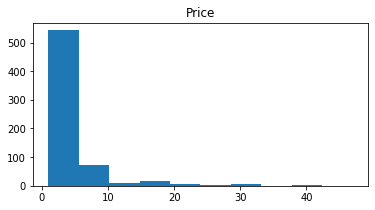

In [302]:
affordable_apps = paid[paid["Price"]<50].copy()
affordable_apps.hist(column="Price", grid=False, figsize=(6,3))

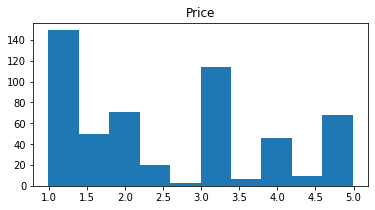

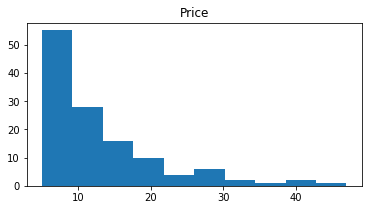

In [303]:
affordable_apps = paid[paid["Price"]<50].copy()
cheap = affordable_apps.Price < 5
reasonable = affordable_apps.Price >= 5
affordable_apps[cheap].hist(column="Price", grid=False, figsize=(6,3))
affordable_apps[reasonable].hist(column="Price", grid=False, figsize=(6,3))
affordable_apps['affordability'] = affordable_apps.apply(
    lambda row: "cheap" if row["Price"] < 5 else "reasonable",axis=1)

-0.055554448536237


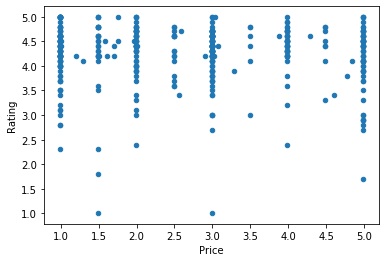

In [304]:
affordable_apps[cheap].plot(kind="scatter", x="Price", y="Rating")
print(affordable_apps[cheap].corr().loc["Rating", "Price"])

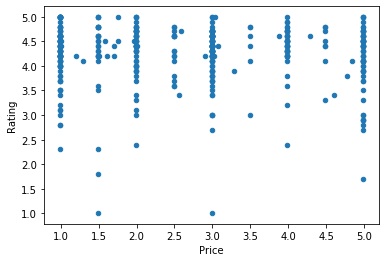

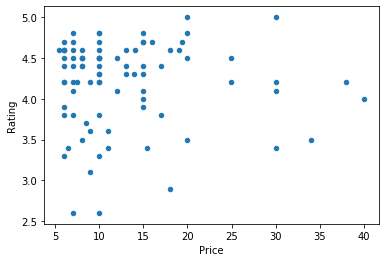

In [305]:
cheap = affordable_apps["Price"] < 5
reasonable = affordable_apps["Price"] >= 5

cheap_mean = affordable_apps[cheap].Price.mean()
affordable_apps['price_criterion'] = affordable_apps.apply(lambda row: 1 if row["Price"] < cheap_mean else 0,axis=1)
affordable_apps[cheap].plot(kind="scatter", x="Price", y="Rating")

reasonable_mean = affordable_apps[reasonable].Price.mean()
affordable_apps['price_criterion'] = affordable_apps.apply(lambda row: 1 if row["Price"] < reasonable_mean else 0,axis=1)
affordable_apps[reasonable].plot(kind="scatter", x="Price", y="Rating")

In [306]:
print(affordable_apps["Genres"].unique())

['Action' 'Strategy' 'Puzzle;Brain Games' 'Card;Action & Adventure'
 'Sports' 'Personalization' 'Arcade' 'Puzzle' 'Productivity' 'Tools'
 'Sports;Action & Adventure' 'Role Playing' 'Photography'
 'Arcade;Action & Adventure' 'Card' 'Simulation;Education' 'Adventure'
 'Education;Pretend Play' 'Weather' 'Lifestyle'
 'Strategy;Action & Adventure' 'Board' 'Finance'
 'Role Playing;Action & Adventure' 'Music' 'Health & Fitness' 'Business'
 'Simulation' 'Adventure;Action & Adventure' 'Parenting'
 'Adventure;Brain Games' 'Communication' 'Entertainment'
 'Educational;Pretend Play' 'Casual;Pretend Play' 'Medical'
 'Board;Brain Games' 'Action;Action & Adventure' 'Books & Reference'
 'Food & Drink' 'Art & Design' 'Racing;Action & Adventure' 'Casual'
 'Education;Creativity' 'Travel & Local' 'Education;Education'
 'Educational;Education' 'Casual;Education' 'Racing' 'Shopping'
 'Maps & Navigation' 'Books & Reference;Education'
 'Education;Action & Adventure' 'Board;Action & Adventure' 'Social'
 'Casua

In [307]:
affordable_apps["genre_count"] = affordable_apps["Genres"].str.count(";")+1
genres_mean = affordable_apps.groupby(["affordability", "genre_count"]).mean()[["Price"]]
genres_mean

Price
affordability genre_count           
cheap         1             2.425996
              2             3.168462
reasonable    1            12.948387
              2             5.990000

In [308]:
def label_genres(row):
    """For each segment in `genres_mean`, labels the apps that cost less than its segment's mean with `1`and the others with `0`."""

    aff = row["affordability"]
    gc = row["genre_count"]
    price = row["Price"]

    if price < genres_mean.loc[(aff, gc)][0]:
        return 1
    else:
        return 0
affordable_apps["genre_criterion"] = affordable_apps.apply(label_genres, axis="columns")

In [309]:
categories_mean = affordable_apps.groupby(["affordability", "Category"]).mean()[["Price"]]


def label_categories(row):
    """For each segment in `categories_mean`,labels the apps that cost less than its segment's mean with `1`and the others with `0`."""

    aff = row["affordability"]
    gc = row["Category"]
    price = row["Price"]

    if price < categories_mean.loc[(aff, gc)][0]:
        return 1
    else:
        return 0

affordable_apps["category_criterion"] = affordable_apps.apply(label_categories, axis="columns")

In [310]:
# use majority voting to decide whether an app's price should increase based on all criteria

criteria = ["price_criterion", "genre_criterion", "category_criterion"]
affordable_apps["Result"] = affordable_apps[criteria].mode(axis='columns')
nr_eligible = affordable_apps["Result"].sum()
print(nr_eligible, nr_eligible/affordable_apps.shape[0], sep="\n")

400
0.6042296072507553


In [311]:
affordable_apps.head(2)

,App,Category,Rating,Reviews,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,S,U,affordability,price_criterion,genre_count,genre_criterion,category_criterion,Result
0,Hitman Sniper,GAME,4.6,408292,"10,000,000+",0.99,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up,29,M,cheap,1,1,1,1,1
1,Grand Theft Auto: San Andreas,GAME,4.4,348962,"1,000,000+",6.99,Mature 17+,Action,"March 21, 2015",1.08,3.0 and up,26,M,reasonable,1,1,1,1,1


In [312]:
def new_price(row):
    if row["affordability"] == "cheap":
        return round(max(row["Price"], cheap_mean), 2)
    else:
        return round(max(row["Price"], reasonable_mean), 2)
    
affordable_apps["New Price"] = affordable_apps.apply(new_price, axis="columns")
affordable_apps["Installs"] = affordable_apps["Installs"].str.replace("[+,]", "").astype(int)
affordable_apps["Impact"] = (affordable_apps["New Price"]-affordable_apps["Price"])*affordable_apps["Installs"]
total_impact = affordable_apps["Impact"].sum()
print(total_impact)

55903126.56


In [313]:
# the above evaluation of impact not reasonable due to lack of data, over estiamting benefits.
affordable_apps.head(2)

,App,Category,Rating,Reviews,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,...,S,U,affordability,price_criterion,genre_count,genre_criterion,category_criterion,Result,New Price,Impact
0,Hitman Sniper,GAME,4.6,408292,10000000,0.99,Mature 17+,Action,"July 12, 2018",1.7.110758,...,29,M,cheap,1,1,1,1,1,2.52,15300000.0
1,Grand Theft Auto: San Andreas,GAME,4.4,348962,1000000,6.99,Mature 17+,Action,"March 21, 2015",1.08,...,26,M,reasonable,1,1,1,1,1,12.89,5900000.0


### Business Metrics 

In [314]:
# Net Promoter Score (NPS) is a customer sucess metric that quantifies customer satisfaction.  Customers who pick anything from 0 through 6 are called detractors;7 or 8 are called passives; 9 or 10 are called promoters.  NPS= %promoters - %detractors

def categorize(s):
    if s >= 0 and s <= 6:
        return "Detractor"
    if s ==7 or s ==8:
        return "Passive"
    if s >= 9:
        return "Promoter"

In [323]:
import pandas as pd
df = pd.read_csv("Raw_data\\nps.csv", parse_dates=["event_date"])
df.head(2)

,event_date,user_id,score
0,2020-01-01 19:00:51,290067447,8
1,2020-01-02 17:34:43,223014806,10


In [318]:
df = pd.read_csv("Raw_data\\nps.csv")
df.head(2)

,event_date,user_id,score
0,2020-01-01 19:00:51,290067447,8
1,2020-01-02 17:34:43,223014806,10


In [324]:
type(df.event_date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [327]:
# year = df["event_date"].dt.year
# month = df["event_date"].dt.month
df['yearmonth'] = df['event_date'].dt.to_period('M')
df['category'] = df.score.apply(categorize)
df.head(2)


,event_date,user_id,score,yearmonth,category
0,2020-01-01 19:00:51,290067447,8,2020-01,Passive
1,2020-01-02 17:34:43,223014806,10,2020-01,Promoter


In [328]:
nps = df.pivot_table(index="yearmonth", columns="category", aggfunc="size")
nps["total_responses"] = nps.sum(axis="columns")
nps["nps"] = (nps["Promoter"]-nps["Detractor"])/nps["total_responses"]
nps["nps"] = (100*nps["nps"]).astype(int)
nps.head(2)

category,Detractor,Passive,Promoter,total_responses,nps
yearmonth,,,,,
2020-01,31,82,215,328,56
2020-02,22,90,161,273,50


Text(0.5, 0, '')

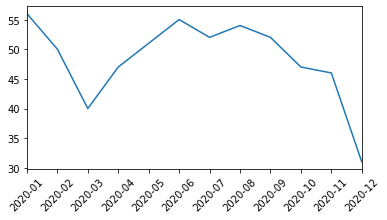

In [330]:
ax = nps.reset_index().plot(kind="line", x="yearmonth", y="nps", figsize=(6,3), legend=False)
ax.set_xticks(nps.index)
ax.set_xticklabels(nps.index, rotation=45)
ax.axes.get_xaxis().set_label_text("")

In [23]:
# Churn rate is the percentage of customers that churned in a given time period

import pandas as pd
subs = pd.read_csv('Raw_data\muscle_labs.csv', parse_dates=["end_date","start_date"])
subs["churn_month"] = subs["end_date"].dt.year*100 + subs["end_date"].dt.month
monthly_churn = pd.DataFrame({"total_churned": subs.groupby("churn_month").size()})
monthly_churn.head(2)

,total_churned
churn_month,
201103,8
201104,16


In [24]:
print(subs["start_date"].min())

2011-01-05 13:55:00


In [25]:
# create a dataframe with a column that accounts for all the relevant months
years = list(range(2011,2015))
months = list(range(1,13))
yearmonths = [y*100+m for y in years for m in months]
print(yearmonths)

[201101, 201102, 201103, 201104, 201105, 201106, 201107, 201108, 201109, 201110, 201111, 201112, 201201, 201202, 201203, 201204, 201205, 201206, 201207, 201208, 201209, 201210, 201211, 201212, 201301, 201302, 201303, 201304, 201305, 201306, 201307, 201308, 201309, 201310, 201311, 201312, 201401, 201402, 201403, 201404, 201405, 201406, 201407, 201408, 201409, 201410, 201411, 201412]


In [26]:
yearmonths = yearmonths[:-1]
churn = pd.DataFrame({"yearmonth": yearmonths})
churn.head()

,yearmonth
0,201101
1,201102
2,201103
3,201104
4,201105


In [27]:
years = list(range(2011,2015))
months = list(range(1,13))
yearmonths = [y*100+m for y in years for m in months]
yearmonths = yearmonths[:-1]

churn = pd.DataFrame({"yearmonth": yearmonths})
churn = pd.merge(churn, monthly_churn, "left", left_on="yearmonth", right_index=True)
churn.fillna(0, inplace=True)
churn["total_churned"] = churn["total_churned"].astype(int)
churn["total_churned"].value_counts().head()

0     2
45    2
55    2
50    2
90    1
Name: total_churned, dtype: int64

In [28]:
import datetime as dt
import matplotlib.pyplot as plt

def get_customers(yearmonth):
    year = yearmonth//100
    month = yearmonth-year*100
    date = dt.datetime(year, month, 1)
    return ((subs["start_date"] < date) & (date <= subs["end_date"])).sum()

churn["total_customers"] = churn["yearmonth"].apply(get_customers)
churn["churn_rate"] = churn["total_churned"] / churn["total_customers"]
churn["yearmonth"] = churn["yearmonth"].astype(str)


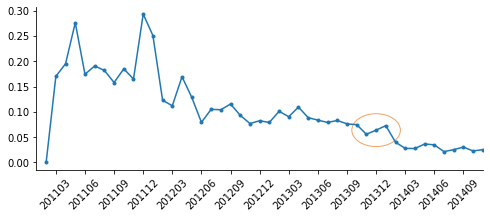

In [38]:
arange = __import__("numpy").arange
Ellipse = __import__("matplotlib").patches.Ellipse
ax = churn.plot(x="yearmonth", y="churn_rate", figsize=(8,3), rot=45, marker=".")
start, end = ax.get_xlim()
ax.get_xticks()
ax.set_xticks(arange(2, end, 3))
ax.set_xticklabels(yearmonths[2::3])
circle = Ellipse((35, churn.loc[churn.yearmonth == "201312", "churn_rate"].iloc[0]), 5, 0.065, color='sandybrown', fill=False)
ax.add_artist(circle)
ax.xaxis.label.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_legend().remove()

### Popular Data Science Questions

In [ ]:
# https://data.stackexchange.com/datascience/query/new

SELECT Id, CreationDate,
       Score, ViewCount, Tags,
       AnswerCount, FavoriteCount
FROM posts
WHERE PostTypeId = 1 AND YEAR(CreationDate) = 2019;

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [52]:
df=pd.read_csv('Raw_data\\2019_questions.csv', encoding= 'unicode_escape', parse_dates=['CreationDate'])
df.head(2)


,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,64746,2019-12-13 07:39:13,2,37,<neural-network><backpropagation><softmax>,1,NaN
1,64750,2019-12-13 08:26:35,0,22,<python>,2,NaN


In [53]:
df.isnull().sum()

Id                  0
CreationDate        0
Score               0
ViewCount           0
Tags                0
AnswerCount         0
FavoriteCount    7217
dtype: int64

In [55]:
df.Tags.apply(lambda value: type(value)).unique()

array([<class 'str'>], dtype=object)

In [56]:
df.fillna(value={"FavoriteCount": 0}, inplace=True)
df["FavoriteCount"] = df["FavoriteCount"].astype(int)
df.dtypes

Id                        int64
CreationDate     datetime64[ns]
Score                     int64
ViewCount                 int64
Tags                     object
AnswerCount               int64
FavoriteCount             int32
dtype: object

In [57]:
df['Tags'] = df.Tags.str.replace("^<|>$", "").str.split("><")
df.sample(3)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
3208,62811,2019-11-07 08:51:05,0,99,"[python, classification, evaluation, metric]",1,0
7905,52790,2019-05-28 21:08:50,2,57,"[machine-learning, statistics, mathematics]",1,0
30,64800,2019-12-13 21:26:04,1,20,"[machine-learning, neural-network, cnn, image-...",1,0


In [58]:
tag_count = dict()

for tags in df["Tags"]:
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1

tag_count = pd.DataFrame.from_dict(tag_count, orient="index")
tag_count.rename(columns={0: "Count"}, inplace=True)
tag_count.head(10)

,Count
neural-network,1040
backpropagation,65
softmax,24
python,1785
machine-learning,2644
deep-learning,1193
classification,670
tensorflow,573
multilabel-classification,91
statistics,228


In [60]:
most_used = tag_count.sort_values(by="Count").tail(20)
most_used.head()

,Count
machine-learning-model,220
statistics,228
clustering,257
predictive-modeling,263
r,264


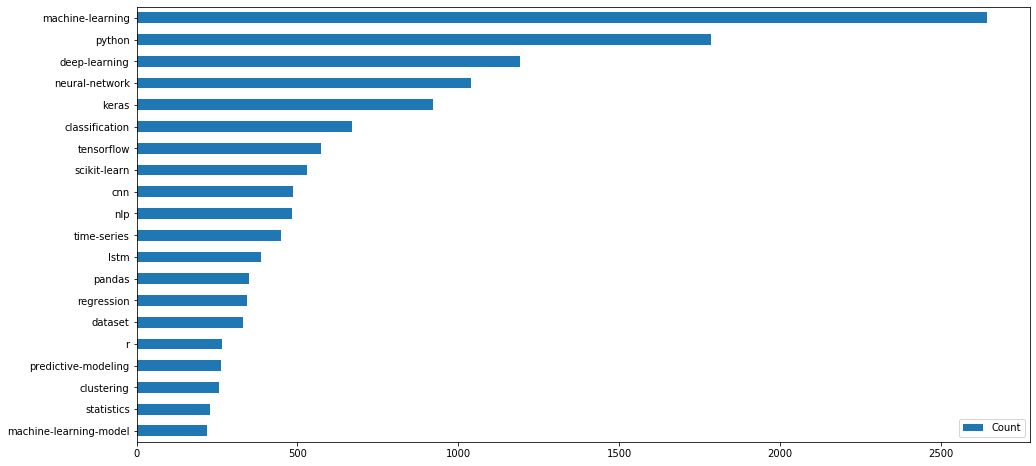

In [61]:
most_used.plot(kind="barh", figsize=(16,8))

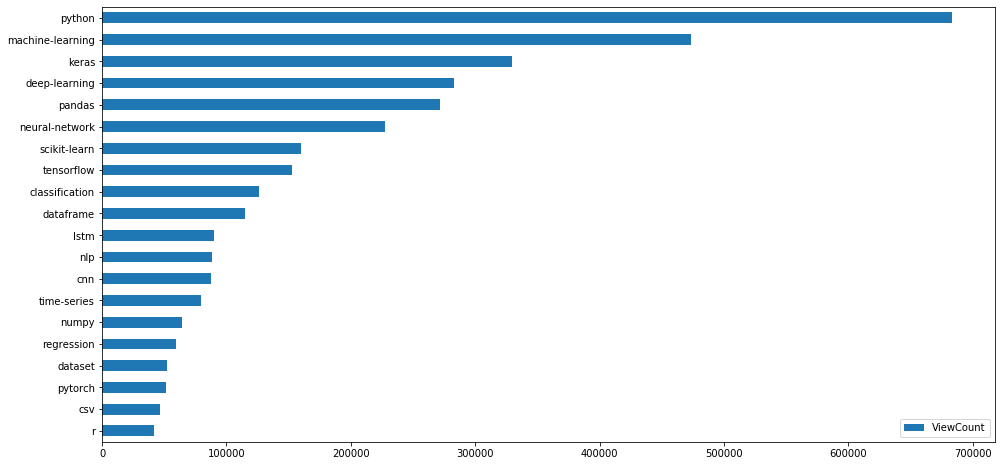

In [62]:
tag_view_count = dict()

for idx, tags in enumerate(df["Tags"]):
    for tag in tags:
        if tag in tag_view_count:
            tag_view_count[tag] += df["ViewCount"].iloc[idx]
        else:
            tag_view_count[tag] = 1
            
tag_view_count = pd.DataFrame.from_dict(tag_view_count, orient="index")
tag_view_count.rename(columns={0: "ViewCount"}, inplace=True)

most_viewed = tag_view_count.sort_values(by="ViewCount").tail(20)

most_viewed.plot(kind="barh", figsize=(16,8))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E5D9BBA5F8>],
      dtype=object)

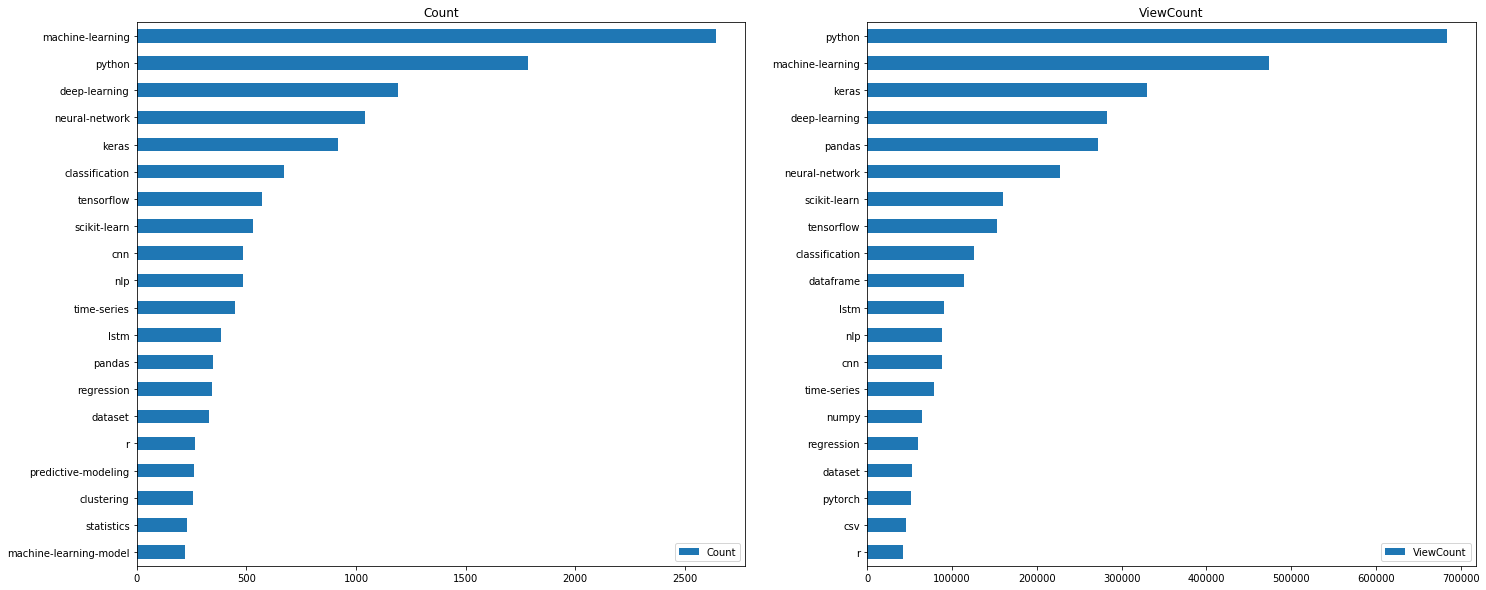

In [63]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((24, 10))
most_used.plot(kind="barh", ax=axes[0], subplots=True)
most_viewed.plot(kind="barh", ax=axes[1], subplots=True)

In [64]:
in_used = pd.merge(most_used, most_viewed, how="left", left_index=True, right_index=True)
in_used.head()

,Count,ViewCount
machine-learning-model,220,NaN
statistics,228,NaN
clustering,257,NaN
predictive-modeling,263,NaN
r,264,41815.0


In [65]:
pd.merge(most_used, most_viewed, how="right", left_index=True, right_index=True).head()

,Count,ViewCount
r,264.0,41815
csv,NaN,46360
pytorch,NaN,51573
dataset,330.0,52347
regression,343.0,59444


### Relations Between Tags

In [67]:
df[df["Tags"].apply(
    lambda tags: True if "r" in tags and "pandas" in tags else False)]

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
1197,49148,2019-04-11 19:41:39,1,84,"[r, data-mining, pandas, matlab, databases]",3,0
5784,60074,2019-09-11 20:35:17,0,30,"[r, pandas, dplyr]",0,0


In [68]:
all_tags = list(tag_count.index)
associations = pd.DataFrame(index=all_tags, columns=all_tags)
associations.iloc[0:4,0:4]

,neural-network,backpropagation,softmax,python
neural-network,NaN,NaN,NaN,NaN
backpropagation,NaN,NaN,NaN,NaN
softmax,NaN,NaN,NaN,NaN
python,NaN,NaN,NaN,NaN


In [69]:
associations.fillna(0, inplace=True)

for tags in df["Tags"]:
    associations.loc[tags, tags] += 1

associations.iloc[0:4,0:4]

,neural-network,backpropagation,softmax,python
neural-network,1040,34,10,135
backpropagation,34,65,3,4
softmax,10,3,24,0
python,135,4,0,1785


In [71]:
relations_most_used = associations.loc[most_used.index, most_used.index]

def style_cells(x):
    helper_df = pd.DataFrame('', index=x.index, columns=x.columns)
    helper_df.loc["time-series", "r"] = "background-color: yellow"
    helper_df.loc["r", "time-series"] = "background-color: yellow"
    for k in range(helper_df.shape[0]):
        helper_df.iloc[k,k] = "color: blue"
    return helper_df

relations_most_used.style.apply(style_cells, axis=None)

,machine-learning-model,statistics,clustering,predictive-modeling,r,dataset,regression,pandas,lstm,time-series,nlp,cnn,scikit-learn,tensorflow,classification,keras,neural-network,deep-learning,python,machine-learning
machine-learning-model,220,3,3,21,7,12,8,4,5,6,4,4,18,9,21,16,10,18,37,138
statistics,3,228,3,15,16,16,15,3,1,20,3,1,6,0,17,3,11,12,35,89
clustering,3,3,257,0,16,5,2,5,3,20,9,0,24,0,12,0,8,2,45,61
predictive-modeling,21,15,0,263,13,7,28,4,12,29,1,6,12,6,26,11,13,32,35,122
r,7,16,16,13,264,6,10,2,3,22,3,2,1,1,10,10,9,5,24,63
dataset,12,16,5,7,6,330,6,12,6,6,11,10,9,9,27,12,20,31,53,99
regression,8,15,2,28,10,6,343,6,11,24,2,6,37,9,33,31,42,21,59,117
pandas,4,3,5,4,2,12,6,349,7,18,3,1,37,3,3,3,1,1,241,62
lstm,5,1,3,12,3,6,11,7,386,83,19,24,2,38,19,128,66,100,59,66
time-series,6,20,20,29,22,6,24,18,83,450,0,8,12,9,24,49,33,41,103,126


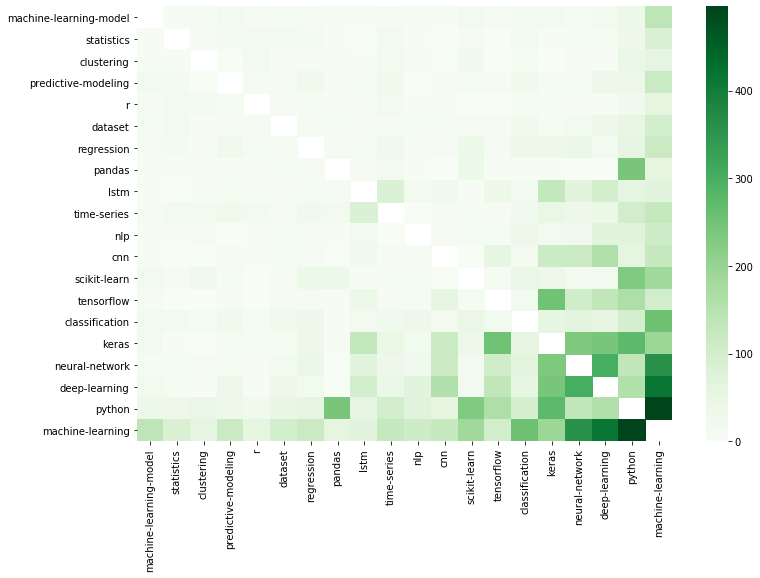

In [73]:
# get rid of the values in blue
for i in range(relations_most_used.shape[0]):
    relations_most_used.iloc[i,i] = pd.np.NaN

plt.figure(figsize=(12,8))
sns.heatmap(relations_most_used, cmap="Greens", annot=False)

In [101]:
df=pd.read_csv('Raw_data\\all_questions.csv', encoding= 'unicode_escape', parse_dates=['CreationDate'])
df.head()

,Id,CreationDate,Tags
0,53717,2019-06-13 13:07:04,<machine-learning><python><nlp>
1,53718,2019-06-13 13:36:48,NaN
2,53720,2019-06-13 14:01:24,NaN
3,53721,2019-06-13 14:31:31,<svm>
4,53722,2019-06-13 14:33:41,<lstm><autoencoder><sequence>


In [103]:
df=df.dropna()
df.head()

,Id,CreationDate,Tags
0,53717,2019-06-13 13:07:04,<machine-learning><python><nlp>
3,53721,2019-06-13 14:31:31,<svm>
4,53722,2019-06-13 14:33:41,<lstm><autoencoder><sequence>
9,53728,2019-06-13 17:23:56,<python><pandas><data>
11,53730,2019-06-13 17:37:57,<machine-learning><deep-learning><random-fores...


In [104]:
df["Tags"] = df["Tags"].str.replace("^<|>$", "").str.split("><")

In [105]:
#  deep learning tags =  a tag that belongs to the list ["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"]

def class_deep_learning(tags):
    for tag in tags:
        if tag in ["lstm", "cnn", "scikit-learn", "tensorflow",
                   "keras", "neural-network", "deep-learning"]:
            return 1
    return 0

In [106]:
df["DeepLearning"] = df["Tags"].apply(class_deep_learning)
df.sample(5)

,Id,CreationDate,Tags,DeepLearning
31257,36104,2018-07-27 15:29:47,"[machine-learning, deep-learning, cnn, image-c...",1
21340,2579,2014-12-02 11:12:06,"[machine-learning, data-mining, statistics, al...",0
12648,29908,2018-04-04 17:14:02,"[python, visualization, pandas]",0
28429,35849,2018-07-21 22:34:36,"[machine-learning, clustering, algorithms]",0
39367,52204,2019-05-19 14:37:20,"[python, categorical-data, encoding]",0


In [107]:
def fetch_quarter(datetime):
    year = str(datetime.year)[-2:]
    quarter = str(((datetime.month-1) // 3) + 1)
    return "{y}Q{q}".format(y=year, q=quarter)

df["Quarter"] = df["CreationDate"].apply(fetch_quarter)

In [108]:
df.head()

,Id,CreationDate,Tags,DeepLearning,Quarter
0,53717,2019-06-13 13:07:04,"[machine-learning, python, nlp]",0,19Q2
3,53721,2019-06-13 14:31:31,[svm],0,19Q2
4,53722,2019-06-13 14:33:41,"[lstm, autoencoder, sequence]",1,19Q2
9,53728,2019-06-13 17:23:56,"[python, pandas, data]",0,19Q2
11,53730,2019-06-13 17:37:57,"[machine-learning, deep-learning, random-fores...",1,19Q2


In [109]:
# group by quarter and Count the number of deep learning questions, Count the total number of questions, Compute the ratio between the two numbers above.

quarterly = df.groupby('Quarter').agg({"DeepLearning": ['sum', 'size']})
quarterly.columns = ['DeepLearningQuestions', 'TotalQuestions']
quarterly["DeepLearningRate"] = quarterly["DeepLearningQuestions"]\
                                /quarterly["TotalQuestions"]

# The following is done to help with visualizations later.
quarterly.reset_index(inplace=True)
quarterly.head(2)



,Quarter,DeepLearningQuestions,TotalQuestions,DeepLearningRate
0,14Q2,9,157,0.057325
1,14Q3,13,189,0.068783


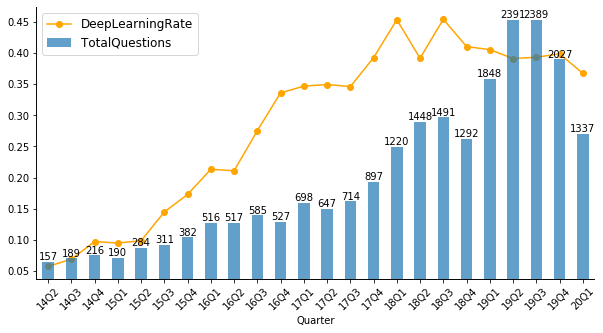

In [110]:
ax1 = quarterly.plot(x="Quarter", y="DeepLearningRate",
                    kind="line", linestyle="-", marker="o", color="orange",
                    figsize=(10,5)
                    )

ax2 = quarterly.plot(x="Quarter", y="TotalQuestions",
                     kind="bar", ax=ax1, secondary_y=True, alpha=0.7, rot=45)

for idx, t in enumerate(quarterly["TotalQuestions"]):
    ax2.text(idx, t, str(t), ha="center", va="bottom")
xlims = ax1.get_xlim()

ax1.get_legend().remove()

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2,
           labels=labels1 + labels2,
           loc="upper left", prop={"size": 12})


for ax in (ax1, ax2):
    for where in ("top", "right"):
        ax.spines[where].set_visible(False)
        ax.tick_params(right=False, labelright=False)